# Problem 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

In [2]:
fn ='BlackHall.txt'
m,merr,v,verr=np.loadtxt(fn,unpack=True,usecols=[0,1,2,3])
logm=[]
logv=[]
logmerr=[]
logverr=[]
for i in range(0,67):
    logm.append(np.log10(m[i])) # log m
    logv.append(np.log10(v[i])) # log v (sigma)
    logmerr.append(merr[i]/m[i]/np.log(10)) # log merr
    logverr.append(verr[i]/v[i]/np.log(10)) # log verr

In [3]:
# (a)
def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(logv,logm)

odr=ODR(data,lin_model,beta0=[0.,1.0])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

print(out.beta[0], out.beta[1]) # a 값과 b 값 출력
print(out.sd_beta[0], out.sd_beta[1]) # a 값의 error 와 b 값의 error 출력

Beta: [-3.95085214  5.36449513]
Beta Std Error: [1.189307   0.53193129]
Beta Covariance: [[105.91316862 -47.27139176]
 [-47.27139176  21.18717664]]
Residual Variance: 0.013354818479491772
Inverse Condition #: 0.002781196346207664
Reason(s) for Halting:
  Sum of squares convergence
-3.9508521392409395 5.364495134829999
1.1893070005060484 0.5319312907299126


In [4]:
# (b)
def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(logv,logm,sx=logverr,sy=logmerr)

odr=ODR(data,lin_model,beta0=[0.,1.0])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

print(out.beta[0], out.beta[1]) # a 값과 b 값 출력
print(out.sd_beta[0], out.sd_beta[1]) # a 값의 error 와 b 값의 error 출력

Beta: [-2.33972617  4.70367147]
Beta Std Error: [0.98627017 0.45017167]
Beta Covariance: [[ 0.04820321 -0.02193871]
 [-0.02193871  0.01004247]]
Residual Variance: 20.179753150369265
Inverse Condition #: 0.0033146515946676173
Reason(s) for Halting:
  Sum of squares convergence
-2.339726173867876 4.703671471807549
0.9862701736081938 0.4501716711932508


(1.5, 3)

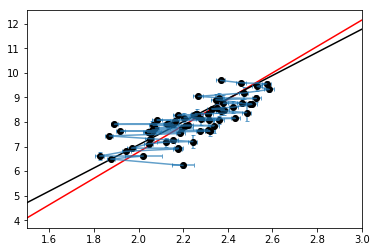

In [5]:
# (c)
t=np.arange(1.5,3,0.001)
plt.plot(t,-3.95085214+5.36449513*t,'r') # error 무시한 fitting
plt.plot(t,-2.33972617+4.70367147*t,'k') # error 고려한 fitting
plt.errorbar(logv,logm,xerr=logverr,yerr=logmerr,alpha=0.7,capsize=2) # errorbar
plt.plot(logv,logm,'ko') # plot data point
plt.xlim(1.5,3)

In [6]:
# (d)
def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(logm,logv,sx=logmerr,sy=logverr)

odr=ODR(data,lin_model,beta0=[0.,1.0])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

print(out.beta[0], out.beta[1]) # c 값과 d 값 출력
print(out.sd_beta[0], out.sd_beta[1]) # c 값의 error 와 d 값의 error 출력

Beta: [0.49738684 0.2126048 ]
Beta Std Error: [0.16225368 0.02034758]
Beta Covariance: [[ 1.30458770e-03 -1.62818794e-04]
 [-1.62818794e-04  2.05167926e-05]]
Residual Variance: 20.179753136996137
Inverse Condition #: 0.0012127783467175601
Reason(s) for Halting:
  Sum of squares convergence
0.49738684014874684 0.21260479751927525
0.16225368353893027 0.020347575026708666


#### logM=a+blogv <=> logv=(-a/b)+(1/b)logM 이므로 c=-a/b 이고 d=1/b 이어야 한다. 실제로 값을 대입해서 계산해보면 예측되는 c = (-2.33972617)/4.70367147 = 0.497 이고, logm , log  v 로 fitting 한 결과 값과 일치함을 확인할 수 있다.

#### 또한 예측되는 d = 1/4.70367147 = 0.2126 으로, 실제로 fitting 한 결과 값인 0.2126 과 같음을 확인할 수 있다.